# Status Mission Prediction

## 1. Problem Statement
 This project aim to understand how the Status Mission is affected by other variables such as Company, Country, Ownership and many other possible variables to be discover. 

## 2. Data Collection
* Data Source: https://www.kaggle.com/datasets/davidroberts13/one-small-step-for-data
* Data Shape: 4324 rows X 15 columns

## 2.1 Import Data and Packages

### Import Pandas, Numpy, Matplolib

In [1]:
import numpy as np
import pandas as pd
import csv
import os
from utility import accuracy_score, decipher_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import set_config
from imblearn.over_sampling import RandomOverSampler
from datetime import datetime

### Import CSV Data as Panda DataFrame

In [2]:
df = pd.read_csv('global_space_launches.csv')

#### Display Data

In [3]:
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,S,1958-02-05 07:33:00+00:00,1958,2,5,05/02/1958,07:33
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,S,1958-02-01 03:48:00+00:00,1958,2,1,01/02/1958,03:48
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,S,1957-12-06 16:44:00+00:00,1957,12,6,06/12/1957,16:44
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Russia,S,1957-11-03 02:30:00+00:00,1957,11,3,03/11/1957,02:30


## 3. Data Checks to Perform
* Columns Cleanliness & Readability
* Check Missing Values
* Check Duplicates
* Check Data Type
* Check Unique Values
* Check Statistics
* Check Categories

## 3.1 Columns Cleanliness & Readability

In [4]:
# Renaming long names
rename_dict = {'Company Name': 'Company',
               ' Rocket': 'Rocket',
               'Country of Launch': 'Launch Country', 
               'Companys Country of Origin': 'Company Origin', 
               'Private or State Run': 'Ownership'}
df.rename(columns=rename_dict, inplace=True)

# Drop duplicate column
df.drop(columns=['DateTime', 'Date'], inplace=True)

## 3.2 Check Missing Values

In [5]:
df.isna().sum()

Company              0
Location             0
Detail               0
Status Rocket        0
Rocket            3360
Status Mission       0
Launch Country       0
Company Origin       0
Ownership            0
Year                 0
Month                0
Day                  0
Time                 0
dtype: int64

There are missing values for Rocket column

### Handling Missing Values

In [6]:
# Adding NA column {isna:1}
df['Rocket_isna'] = np.where(df['Rocket'].isna(), 1, 0)

# Convert everything to strings and delete commas
df['Rocket'] = df['Rocket'].astype(str).str.replace(',', '').astype(float)

## 3.3 Check Duplicates

In [7]:
df.duplicated().sum()

1

In [8]:
# Drop dupplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

## 3.4 Check Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         4323 non-null   object 
 1   Location        4323 non-null   object 
 2   Detail          4323 non-null   object 
 3   Status Rocket   4323 non-null   object 
 4   Rocket          963 non-null    float64
 5   Status Mission  4323 non-null   object 
 6   Launch Country  4323 non-null   object 
 7   Company Origin  4323 non-null   object 
 8   Ownership       4323 non-null   object 
 9   Year            4323 non-null   int64  
 10  Month           4323 non-null   int64  
 11  Day             4323 non-null   int64  
 12  Time            4323 non-null   object 
 13  Rocket_isna     4323 non-null   int32  
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 489.7+ KB


## 3.5 Check Unique Values

In [10]:
# Count the number of unique values in each column 
df.nunique()

Company             55
Location           137
Detail            4278
Status Rocket        2
Rocket              56
Status Mission       4
Launch Country      16
Company Origin      17
Ownership            2
Year                64
Month               12
Day                 31
Time              1273
Rocket_isna          2
dtype: int64

## 3.6 Check Statistics

In [11]:
df.describe(include='all')

,Company,Location,Detail,Status Rocket,Rocket,Status Mission,Launch Country,Company Origin,Ownership,Year,Month,Day,Time,Rocket_isna
count,4323,4323,4323,4323,963.000000,4323,4323,4323,4323,4323.000000,4323.000000,4323.000000,4323,4323.000000
unique,55,137,4278,2,NaN,4,16,17,2,NaN,NaN,NaN,1273,NaN
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success,Russia,Russia,S,NaN,NaN,NaN,00:00,NaN
freq,1777,235,6,3534,NaN,3878,1398,2064,2930,NaN,NaN,NaN,135,NaN
mean,NaN,NaN,NaN,NaN,153.921007,NaN,NaN,NaN,NaN,1987.381911,6.753181,16.441591,NaN,0.777238
std,NaN,NaN,NaN,NaN,288.572876,NaN,NaN,NaN,NaN,18.071932,3.416812,8.635934,NaN,0.416148
min,NaN,NaN,NaN,NaN,5.300000,NaN,NaN,NaN,NaN,1957.000000,1.000000,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,1972.000000,4.000000,9.000000,NaN,1.000000
50%,NaN,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,1984.000000,7.000000,17.000000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,164.000000,NaN,NaN,NaN,NaN,2002.000000,10.000000,24.000000,NaN,1.000000


## 3.7 Check Categories

In [12]:
# Define numerical & categorical columns
initial_numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
initial_categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print('There are possible {} numerical features: {}\n'.format(len(initial_numerical_features), initial_numerical_features))
print('There are possible {} categorical features: {}'.format(len(initial_categorical_features), initial_categorical_features))

There are possible 5 numerical features: ['Rocket', 'Year', 'Month', 'Day', 'Rocket_isna']

There are possible 9 categorical features: ['Company', 'Location', 'Detail', 'Status Rocket', 'Status Mission', 'Launch Country', 'Company Origin', 'Ownership', 'Time']


## 4. Handling Various Features

In [13]:
# Handling Rocket Feature
imp_strat = 0
imputer = SimpleImputer(missing_values=np.nan, fill_value=imp_strat)

In [14]:
# Handling Status Mission Feature
df.loc[:, 'Status Mission'] = (df['Status Mission'] == 'Success').astype(int)
df['Status Mission'].unique()

## 5. Preprocessor

In [17]:
X_init=df[['Rocket']]

In [18]:
X_init = imputer.fit_transform(X_init)

In [19]:
y_init=df['Status Mission'].astype(int)

<Axes: ylabel='count'>

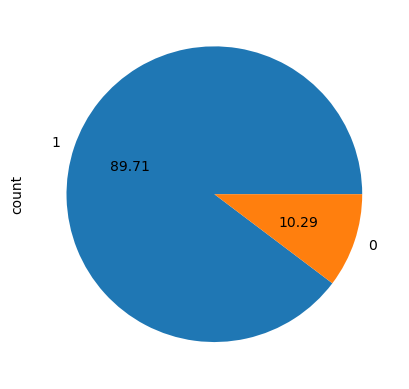

In [20]:
y_init.value_counts().plot.pie(autopct='%.2f')

In [21]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

In [22]:
X_resampled, y_resampled = ros.fit_resample(X_init,y_init)
print(len(X_resampled), len(y_resampled))

7756 7756


<Axes: ylabel='count'>

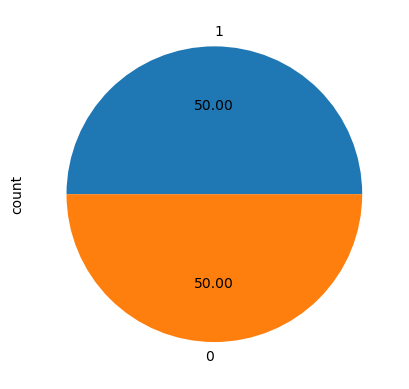

In [23]:
y_resampled.value_counts().plot.pie(autopct='%.2f')

### Balancing the Data manually

In [24]:
# Separate minority & majority class
minority_data = df[~df['Status Mission'].astype(bool)]
majority_data = df[df['Status Mission'].astype(bool)]

In [25]:
# get the ratio
over_sample_ratio = len(majority_data)/len(minority_data)

In [26]:
# round it up
os_ceil = int(np.ceil(over_sample_ratio))

In [27]:
# new oversampled data
os_minority_data = pd.concat([minority_data] * os_ceil)

In [28]:
# concat the new data with old data
df_resampled = pd.concat([majority_data, os_minority_data])

In [29]:
X_resampled2 = df_resampled[['Year']]

In [30]:
y_resampled2 = df_resampled['Status Mission'].astype(int)

In [31]:
y_resampled2.value_counts()

Status Mission
0    4005
1    3878
Name: count, dtype: int64

<Axes: ylabel='count'>

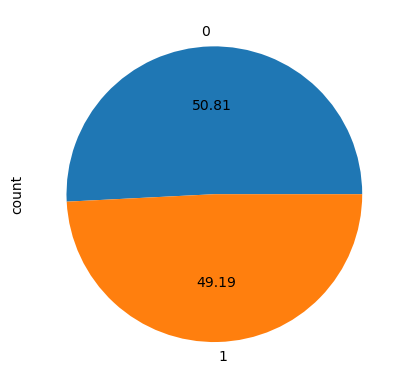

In [32]:
y_resampled2.value_counts().plot.pie(autopct='%.2f')

In [33]:
# Reconfig X and y
X = X_resampled
y = y_resampled

## 6. Model

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X, y)

LogisticRegression()

In [36]:
y.sum()

3878

In [37]:
y_pred = model.predict(X)
y_pred.sum()

6679

In [38]:
accuracy = accuracy_score(y_pred, y)
accuracy

0.4715059308922125

In [39]:
matrix = confusion_matrix(y_pred, y)
matrix

array([[ 428,  649],
       [3450, 3229]], dtype=int64)

In [40]:
true_negative, false_positive, false_negative, true_positive, precision, recall, f1 = decipher_confusion_matrix(matrix)
print('Actual Failure Predicted Failure:', true_negative)
print('Actual Failure Predicted Success:', false_positive)
print('Actual Success Predicted Failure:', false_negative)
print('Actual Success Predicted Success:', true_positive)
print(precision)
print(recall)
print(f1)

Actual Failure Predicted Failure: 428
Actual Failure Predicted Success: 649
Actual Success Predicted Failure: 3450
Actual Success Predicted Success: 3229
0.832645693656524
0.4834556071268154
0.6117268163303969


## 7. Record

In [41]:
exp_num = 15
note = 'Oversampled: Rocket|Status Rocket'
observe = 'Similar performance to mean'
action = 'Standby...'

In [42]:
csv_file = 'metric_logreg.csv'

# Create a dictionary with the variables
row = {
    'Timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'Experiment': exp_num,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'True Negative': true_negative,
    'False Positive': false_positive,
    'False Negative': false_negative,
    'True Positive': true_positive,
    'Impute Method': imp_strat,
    'Note': note,
    'Observation': observe,
    'Action': action
}